In [1]:
import sys
import importlib
import pandas as pd
sys.path.append("scripts")
# importlib.reload(sys.modules['tmdb_client'])
# importlib.reload(sys.modules['clean_data'])
# importlib.reload(sys.modules['kpi_analysis'])
# importlib.reload(sys.modules['visualizations'])

from tmdb_client import ( 
    fetch_popular_movies,
    get_movie_details,
    search_movie,
    get_all_movies_by_ids
)

from analysis import movies_to_dataframe

from clean_data import (
drop_irrelevant_columns,
clean_movie_data,
inspect_categorical_columns_using_value_counts,
replace_unrealistic_values,
removing_na_and_duplicates,
finalize_dataframe

)

from kpi_analysis import (
    get_kpis,
    search_best_scifi_action_bruce,
    search_uma_thurman_tarentino,
    franchise_vs_standalone,
    franchise_success,
    director_success,
    
)

from visualizations import (
    plot_revenue_vs_budget,
    plot_roi_by_genre,
    plot_popularity_vs_rating,
    plot_yearly_box_office,
    plot_franchise_vs_standalone
)

In [2]:
movies = fetch_popular_movies(page=1)

In [3]:
print(movies['results'])

[{'adult': False, 'backdrop_path': '/5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg', 'genre_ids': [16, 10751, 35, 12, 9648], 'id': 1084242, 'original_language': 'en', 'original_title': 'Zootopia 2', 'overview': "After cracking the biggest case in Zootopia's history, rookie cops Judy Hopps and Nick Wilde find themselves on the twisting trail of a great mystery when Gary De’Snake arrives and turns the animal metropolis upside down. To crack the case, Judy and Nick must go undercover to unexpected new parts of town, where their growing partnership is tested like never before.", 'popularity': 555.4388, 'poster_path': '/3Wg1LBCiTEXTxRrkNKOqJyyIFyF.jpg', 'release_date': '2025-11-26', 'title': 'Zootopia 2', 'video': False, 'vote_average': 7.739, 'vote_count': 324}, {'adult': False, 'backdrop_path': '/6bzabqH399ioM3nZScwZtzGaHIy.jpg', 'genre_ids': [878, 12, 28], 'id': 533533, 'original_language': 'en', 'original_title': 'TRON: Ares', 'overview': "A highly sophisticated Program called Ares is sent from the d

In [4]:
df_movies = movies_to_dataframe(movies['results'])

In [5]:
df_movies.head()

adult                     backdrop_path                  genre_ids  \
0  False  /5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg  [16, 10751, 35, 12, 9648]   
1  False  /6bzabqH399ioM3nZScwZtzGaHIy.jpg              [878, 12, 28]   
2  False  /lZYMXx74pWmbj5Q5jp1QaMvmuuR.jpg               [28, 14, 53]   
3  False  /4BtL2vvEufDXDP4u6xQjjQ1Y2aT.jpg               [28, 80, 53]   
4  False  /1hDUJFAYkLJUCoiXzDi2cLmFh4m.jpg               [28, 18, 14]   

        id original_language      original_title  \
0  1084242                en          Zootopia 2   
1   533533                en          TRON: Ares   
2  1180831                no             Troll 2   
3  1419406                zh                捕风追影   
4  1083637                kn  ಕಾಂತಾರ: ಅಧ್ಯಾಯ - ೧   

                                            overview  popularity  \
0  After cracking the biggest case in Zootopia's ...    555.4388   
1  A highly sophisticated Program called Ares is ...    446.5362   
2  When a dangerous new troll unleashes devastati...    440.9976   
3  Macau Police brings the tracking expert police...    256.2961   
4  During the Kadamba reign, King Vijayendra, the...    302.0064   

                        poster_path release_date  \
0  /3Wg1LBCiTEXTxRrkNKOqJyyIFyF.jpg   2025-11-26   
1  /chpWmskl3aKm1aTZqUHRCtviwPy.jpg   2025-10-08   
2  /p6xAExLNFbHcLfvSuvLPoM8aqZU.jpg   2025-11-30   
3  /e0RU6KpdnrqFxDKlI3NOqN8nHL6.jpg   2025-08-16   
4  /zBvw25afDn93embB8L7FzvTT2xq.jpg   2025-10-01   

                           title  video  vote_average  vote_count  
0                     Zootopia 2  False         7.739         324  
1                     TRON: Ares  False         6.458         506  
2                        Troll 2  False         6.900         101  
3              The Shadow's Edge  False         6.400         132  
4  Kantara - A Legend: Chapter 1  False         7.361          36

In [6]:
zootopia_details = get_movie_details(1084242)
zootopia_details = pd.DataFrame([zootopia_details])

In [7]:
zootopia_details

adult                     backdrop_path  \
0  False  /5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg   

                               belongs_to_collection     budget  \
0  {'id': 1084247, 'name': 'Zootopia Collection',...  150000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   

                               homepage       id     imdb_id origin_country  \
0  https://movies.disney.com/zootopia-2  1084242  tt26443597           [US]   

  original_language  ...    revenue runtime  \
0                en  ...  560333554     107   

                                    spoken_languages    status  \
0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                                 tagline       title  video  vote_average  \
0  Zootopia will be changed furrrever...  Zootopia 2  False         7.736   

   vote_count                                            credits  
0         314  {'cast': [{'adult': False, 'gender': 1, 'id': ...  

[1 rows x 27 columns]

## Fetch all movies and store in a Database

In [8]:
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]

In [9]:
movies = get_all_movies_by_ids(movie_ids)

In [10]:
movies

[{'success': False,
  'status_code': 34,
  'status_message': 'The resource you requested could not be found.'},
 {'adult': False,
  'backdrop_path': '/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg',
  'belongs_to_collection': {'id': 86311,
   'name': 'The Avengers Collection',
   'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
   'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
  'budget': 356000000,
  'genres': [{'id': 12, 'name': 'Adventure'},
   {'id': 878, 'name': 'Science Fiction'},
   {'id': 28, 'name': 'Action'}],
  'homepage': 'https://www.marvel.com/movies/avengers-endgame',
  'id': 299534,
  'imdb_id': 'tt4154796',
  'origin_country': ['US'],
  'original_language': 'en',
  'original_title': 'Avengers: Endgame',
  'overview': "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the univ

In [11]:
df = movies_to_dataframe(movies)

In [12]:
df

success  status_code                                  status_message  \
0    False         34.0  The resource you requested could not be found.   
1      NaN          NaN                                             NaN   
2      NaN          NaN                                             NaN   
3      NaN          NaN                                             NaN   
4      NaN          NaN                                             NaN   
5      NaN          NaN                                             NaN   
6      NaN          NaN                                             NaN   
7      NaN          NaN                                             NaN   
8      NaN          NaN                                             NaN   
9      NaN          NaN                                             NaN   
10     NaN          NaN                                             NaN   
11     NaN          NaN                                             NaN   
12     NaN          NaN                                             NaN   
13     NaN          NaN                                             NaN   
14     NaN          NaN                                             NaN   
15     NaN          NaN                                             NaN   
16     NaN          NaN                                             NaN   
17     NaN          NaN                                             NaN   
18     NaN          NaN                                             NaN   

    adult                     backdrop_path  \
0     NaN                               NaN   
1   False  /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg   
2   False  /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg   
3   False  /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg   
4   False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
5   False  /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg   
6   False  /dF6FjTZzRTENfB4R17HDN20jLT2.jpg   
7   False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
8   False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   
9   False  /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg   
10  False  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg   
11  False  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg   
12  False  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg   
13  False  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg   
14  False  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg   
15  False  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg   
16  False  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg   
17  False  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg   
18  False  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg   

                                belongs_to_collection       budget  \
0                                                 NaN          NaN   
1   {'id': 86311, 'name': 'The Avengers Collection...  356000000.0   
2   {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000.0   
3   {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000.0   
4   {'id': 86311, 'name': 'The Avengers Collection...  300000000.0   
5                                                None  200000000.0   
6   {'id': 328, 'name': 'Jurassic Park Collection'...  150000000.0   
7   {'id': 762512, 'name': 'The Lion King (Reboot)...  260000000.0   
8   {'id': 86311, 'name': 'The Avengers Collection...  220000000.0   
9   {'id': 9485, 'name': 'The Fast and the Furious...  190000000.0   
10  {'id': 86311, 'name': 'The Avengers Collection...  235000000.0   
11  {'id': 529892, 'name': 'Black Panther Collecti...  200000000.0   
12  {'id': 1241, 'name': 'Harry Potter Collection'...  125000000.0   
13  {'id': 10, 'name': 'Star Wars Collection', 'po...  300000000.0   
14  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000.0   
15  {'id': 328, 'name': 'Jurassic Park Collection'...  170000000.0   
16  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000.0   
17                                               None  160000000.0   
18  {'id': 468222, 'name': 'The Incredibles Collec...  200000000.0   

                                               genres  \
0                                                 NaN   
1   [{'id': 12, 'name': 'Adventure'}, {'id': 8

In [13]:
df.columns

Index(['success', 'status_code', 'status_message', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'origin_country', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'credits'],
      dtype='object')

## Drop irrelevant columns

In [14]:
cols_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage', 	'success', 'status_code', 'status_message']
df = drop_irrelevant_columns(df, cols_to_drop)

In [15]:
df

backdrop_path  \
0                                NaN   
1   /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg   
2   /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg   
3   /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg   
4   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
5   /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg   
6   /dF6FjTZzRTENfB4R17HDN20jLT2.jpg   
7   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
8   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   
9   /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg   
10  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg   
11  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg   
12  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg   
13  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg   
14  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg   
15  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg   
16  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg   
17  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg   
18  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg   

                                belongs_to_collection       budget  \
0                                                 NaN          NaN   
1   {'id': 86311, 'name': 'The Avengers Collection...  356000000.0   
2   {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000.0   
3   {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000.0   
4   {'id': 86311, 'name': 'The Avengers Collection...  300000000.0   
5                                                None  200000000.0   
6   {'id': 328, 'name': 'Jurassic Park Collection'...  150000000.0   
7   {'id': 762512, 'name': 'The Lion King (Reboot)...  260000000.0   
8   {'id': 86311, 'name': 'The Avengers Collection...  220000000.0   
9   {'id': 9485, 'name': 'The Fast and the Furious...  190000000.0   
10  {'id': 86311, 'name': 'The Avengers Collection...  235000000.0   
11  {'id': 529892, 'name': 'Black Panther Collecti...  200000000.0   
12  {'id': 1241, 'name': 'Harry Potter Collection'...  125000000.0   
13  {'id': 10, 'name': 'Star Wars Collection', 'po...  300000000.0   
14  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000.0   
15  {'id': 328, 'name': 'Jurassic Park Collection'...  170000000.0   
16  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000.0   
17                                               None  160000000.0   
18  {'id': 468222, 'name': 'The Incredibles Collec...  200000000.0   

                                               genres        id  \
0                                                 NaN       NaN   
1   [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...  299534.0   
2   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   19995.0   
3   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  140607.0   
4   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  299536.0   
5   [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...     597.0   
6   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  135397.0   
7   [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...  420818.0   
8   [{'id': 878, 'name': 'Science Fiction'}, {'id'...   24428.0   
9   [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...  168259.0   
10  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   99861.0   
11  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  284054.0   
12  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   12445.0   
13  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  181808.0   
14  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  330457.0   
15  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  351286.0   
16  [{'id': 16, 'name': 'Animation'}, {'id': 10751...  109445.0   
17  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...  321612.0   
18  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  260513.0   

   origin_country original_language  \
0             NaN               NaN   
1            [US]                en   
2            [US]                en   
3            [US]                en   
4            [US]                en   
5            [US]                en   
6            [US]                en   
7            [US]                en   
8            [US]                en   
9            [US]                en   
10           [US]                en   
11          

In [16]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

## Evaluate JSON-like columns

In [17]:
categorical_columns = ['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 'spoken_languages', 'origin_country','credits']

In [18]:
df[categorical_columns].head(5)

belongs_to_collection  \
0                                                NaN   
1  {'id': 86311, 'name': 'The Avengers Collection...   
2  {'id': 87096, 'name': 'Avatar Collection', 'po...   
3  {'id': 10, 'name': 'Star Wars Collection', 'po...   
4  {'id': 86311, 'name': 'The Avengers Collection...   

                                              genres  \
0                                                NaN   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
2  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
4  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   

                                production_countries  \
0                                                NaN   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   

                                production_companies  \
0                                                NaN   
1  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
2  [{'id': 444, 'logo_path': None, 'name': 'Dune ...   
3  [{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...   
4  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                    spoken_languages origin_country  \
0                                                NaN            NaN   
1  [{'english_name': 'English', 'iso_639_1': 'en'...           [US]   
2  [{'english_name': 'English', 'iso_639_1': 'en'...           [US]   
3  [{'english_name': 'English', 'iso_639_1': 'en'...           [US]   
4  [{'english_name': 'English', 'iso_639_1': 'en'...           [US]   

                                             credits  
0                                                NaN  
1  {'cast': [{'adult': False, 'gender': 2, 'id': ...  
2  {'cast': [{'adult': False, 'gender': 2, 'id': ...  
3  {'cast': [{'adult': False, 'gender': 2, 'id': ...  
4  {'cast': [{'adult': False, 'gender': 2, 'id': ...

## Extracting and cleaning json columns

In [19]:
df.info

<bound method DataFrame.info of                        backdrop_path  \
0                                NaN   
1   /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg   
2   /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg   
3   /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg   
4   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
5   /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg   
6   /dF6FjTZzRTENfB4R17HDN20jLT2.jpg   
7   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
8   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   
9   /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg   
10  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg   
11  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg   
12  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg   
13  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg   
14  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg   
15  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg   
16  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg   
17  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg   
18  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg   

                                belongs_to_collection       budget  \
0                                                 NaN          NaN   
1   {'id': 86311, 'name': '

In [20]:
df = clean_movie_data(df)

In [21]:
df

backdrop_path                belongs_to_collection  \
0                                NaN                                  NaN   
1   /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg              The Avengers Collection   
2   /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg                    Avatar Collection   
3   /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg                 Star Wars Collection   
4   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg              The Avengers Collection   
5   /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg                                  NaN   
6   /dF6FjTZzRTENfB4R17HDN20jLT2.jpg             Jurassic Park Collection   
7   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg    The Lion King (Reboot) Collection   
8   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg              The Avengers Collection   
9   /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg  The Fast and the Furious Collection   
10  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg              The Avengers Collection   
11  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg             Black Panther Collection   
12  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg              Harry Potter Collection   
13  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg                 Star Wars Collection   
14  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg                    Frozen Collection   
15  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg             Jurassic Park Collection   
16  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg                    Frozen Collection   
17  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg                                  NaN   
18  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg           The Incredibles Collection   

         budget                                     genres        id  \
0           NaN                                        NaN       NaN   
1   356000000.0           Adventure|Science Fiction|Action  299534.0   
2   237000000.0   Action|Adventure|Fantasy|Science Fiction   19995.0   
3   245000000.0           Adventure|Action|Science Fiction  140607.0   
4   300000000.0           Adventure|Action|Science Fiction  299536.0   
5   200000000.0                              Drama|Romance     597.0   
6   150000000.0  Action|Adventure|Science Fiction|Thriller  135397.0   
7   260000000.0           Adventure|Drama|Family|Animation  420818.0   
8   220000000.0           Science Fiction|Action|Adventure   24428.0   
9   190000000.0                      Action|Crime|Thriller  168259.0   
10  235000000.0           Action|Adventure|Science Fiction   99861.0   
11  200000000.0           Action|Adventure|Science Fiction  284054.0   
12  125000000.0                          Adventure|Fantasy   12445.0   
13  300000000.0           Adventure|Action|Science Fiction  181808.0   
14  150000000.0  Family|Animation|Adventure|Comedy|Fantasy  330457.0   
15  170000000.0  Action|Adventure|Science Fiction|Thriller  351286.0   
16  150000000.0         Animation|Family|Adventure|Fantasy  109445.0   
17  160000000.0                     Family|Fantasy|Romance  321612.0   
18  200000000.0          Action|Adventure|Animation|Family  260513.0   

   origin_country original_language  \
0             NaN               NaN   
1              US                en   
2              US                en   
3              US                en   
4              US                en   
5              US                en   
6              US                en   
7              US                en   
8              US                en   
9              US                en   
10             US                en   
11             US                en   
12             GB                en   
13             US                en   
14             US                en   
15             US                en   
16             US                en   
17             US                en   
18             US                en   

                                             overview  popularity  \
0                                                 NaN         NaN   
1   After the devastating events of Avengers: Infi...     13.5434   
2   In the 22nd century, a paraplegic Marine is di...

### Inspected the updated and new categorical columns after json conversion

In [22]:
categorical_columns = ['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 'spoken_languages', 'origin_country','cast', 'cast_size', 'director', 'crew_size']

In [23]:
inspect_categorical_columns_using_value_counts(df,categorical_columns)

Value counts for column: ====== belongs_to_collection ======
belongs_to_collection
The Avengers Collection                4
NaN                                    3
Star Wars Collection                   2
Frozen Collection                      2
Jurassic Park Collection               2
Avatar Collection                      1
The Lion King (Reboot) Collection      1
The Fast and the Furious Collection    1
Black Panther Collection               1
Harry Potter Collection                1
The Incredibles Collection             1
Name: count, dtype: int64


Value counts for column: ====== genres ======
genres
Adventure|Action|Science Fiction             3
Action|Adventure|Science Fiction|Thriller    2
Action|Adventure|Science Fiction             2
Action|Adventure|Fantasy|Science Fiction     1
Adventure|Science Fiction|Action             1
Drama|Romance                                1
NaN                                          1
Adventure|Drama|Family|Animation             1
Science F

## Replace unrealistic values

In [24]:
df = replace_unrealistic_values(df)

In [25]:
df

backdrop_path                belongs_to_collection  \
0                                NaN                                  NaN   
1   /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg              The Avengers Collection   
2   /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg                    Avatar Collection   
3   /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg                 Star Wars Collection   
4   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg              The Avengers Collection   
5   /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg                                  NaN   
6   /dF6FjTZzRTENfB4R17HDN20jLT2.jpg             Jurassic Park Collection   
7   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg    The Lion King (Reboot) Collection   
8   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg              The Avengers Collection   
9   /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg  The Fast and the Furious Collection   
10  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg              The Avengers Collection   
11  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg             Black Panther Collection   
12  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg              Harry Potter Collection   
13  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg                 Star Wars Collection   
14  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg                    Frozen Collection   
15  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg             Jurassic Park Collection   
16  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg                    Frozen Collection   
17  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg                                  NaN   
18  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg           The Incredibles Collection   

                                       genres        id origin_country  \
0                                         NaN       NaN            NaN   
1            Adventure|Science Fiction|Action  299534.0             US   
2    Action|Adventure|Fantasy|Science Fiction   19995.0             US   
3            Adventure|Action|Science Fiction  140607.0             US   
4            Adventure|Action|Science Fiction  299536.0             US   
5                               Drama|Romance     597.0             US   
6   Action|Adventure|Science Fiction|Thriller  135397.0             US   
7            Adventure|Drama|Family|Animation  420818.0             US   
8            Science Fiction|Action|Adventure   24428.0             US   
9                       Action|Crime|Thriller  168259.0             US   
10           Action|Adventure|Science Fiction   99861.0             US   
11           Action|Adventure|Science Fiction  284054.0             US   
12                          Adventure|Fantasy   12445.0             GB   
13           Adventure|Action|Science Fiction  181808.0             US   
14  Family|Animation|Adventure|Comedy|Fantasy  330457.0             US   
15  Action|Adventure|Science Fiction|Thriller  351286.0             US   
16         Animation|Family|Adventure|Fantasy  109445.0             US   
17                     Family|Fantasy|Romance  321612.0             US   
18          Action|Adventure|Animation|Family  260513.0             US   

   original_language                                           overview  \
0                NaN                                                NaN   
1                 en  After the devastating events of Avengers: Infi...   
2                 en  In the 22nd century, a paraplegic Marine is di...   
3                 en  Thirty years after defeating the Galactic Empi...   
4                 en  As the Avengers and their allies have continue...   
5                 en  101-year-old Rose DeWitt Bukater tells the sto...   
6                 en  Twenty-two years after the events of Jurassic ...   
7                 en  Simba idolizes his father, King Mufasa, and ta...   
8                 en  When an unexpected enemy emerges and threatens...   
9                 en  Deckard Shaw seeks revenge against Dominic Tor...   
10                en  When Tony Stark tries to jumpstart a dormant p...   
11                en  King T'Challa returns home to the reclusive, t...   
12                en  Harr

In [26]:
df[['budget_musd', 'revenue_musd']]

budget_musd  revenue_musd
0           NaN           NaN
1         356.0   2799.439100
2         237.0   2923.706026
3         245.0   2068.223624
4         300.0   2052.415039
5         200.0   2264.162353
6         150.0   1671.537444
7         260.0   1662.020819
8         220.0   1518.815515
9         190.0   1515.400000
10        235.0   1405.403694
11        200.0   1349.926083
12        125.0   1341.511219
13        300.0   1332.698830
14        150.0   1453.683476
15        170.0   1310.469037
16        150.0   1274.219009
17        160.0   1266.115964
18        200.0   1243.225667

## Removing NAN's, dropping duplicates and filtering for released movies only

In [27]:
df = removing_na_and_duplicates(df)

In [28]:
df

backdrop_path                belongs_to_collection  \
1   /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg              The Avengers Collection   
2   /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg                    Avatar Collection   
3   /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg                 Star Wars Collection   
4   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg              The Avengers Collection   
5   /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg                                  NaN   
6   /dF6FjTZzRTENfB4R17HDN20jLT2.jpg             Jurassic Park Collection   
7   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg    The Lion King (Reboot) Collection   
8   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg              The Avengers Collection   
9   /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg  The Fast and the Furious Collection   
10  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg              The Avengers Collection   
11  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg             Black Panther Collection   
12  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg              Harry Potter Collection   
13  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg                 Star Wars Collection   
14  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg                    Frozen Collection   
15  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg             Jurassic Park Collection   
16  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg                    Frozen Collection   
17  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg                                  NaN   
18  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg           The Incredibles Collection   

                                       genres        id origin_country  \
1            Adventure|Science Fiction|Action  299534.0             US   
2    Action|Adventure|Fantasy|Science Fiction   19995.0             US   
3            Adventure|Action|Science Fiction  140607.0             US   
4            Adventure|Action|Science Fiction  299536.0             US   
5                               Drama|Romance     597.0             US   
6   Action|Adventure|Science Fiction|Thriller  135397.0             US   
7            Adventure|Drama|Family|Animation  420818.0             US   
8            Science Fiction|Action|Adventure   24428.0             US   
9                       Action|Crime|Thriller  168259.0             US   
10           Action|Adventure|Science Fiction   99861.0             US   
11           Action|Adventure|Science Fiction  284054.0             US   
12                          Adventure|Fantasy   12445.0             GB   
13           Adventure|Action|Science Fiction  181808.0             US   
14  Family|Animation|Adventure|Comedy|Fantasy  330457.0             US   
15  Action|Adventure|Science Fiction|Thriller  351286.0             US   
16         Animation|Family|Adventure|Fantasy  109445.0             US   
17                     Family|Fantasy|Romance  321612.0             US   
18          Action|Adventure|Animation|Family  260513.0             US   

   original_language                                           overview  \
1                 en  After the devastating events of Avengers: Infi...   
2                 en  In the 22nd century, a paraplegic Marine is di...   
3                 en  Thirty years after defeating the Galactic Empi...   
4                 en  As the Avengers and their allies have continue...   
5                 en  101-year-old Rose DeWitt Bukater tells the sto...   
6                 en  Twenty-two years after the events of Jurassic ...   
7                 en  Simba idolizes his father, King Mufasa, and ta...   
8                 en  When an unexpected enemy emerges and threatens...   
9                 en  Deckard Shaw seeks revenge against Dominic Tor...   
10                en  When Tony Stark tries to jumpstart a dormant p...   
11                en  King T'Challa returns home to the reclusive, t...   
12                en  Harry, Ron and Hermione continue their quest t...   
13                en  Rey develops her newly discovered abilities wi...   
14                en  Elsa, Anna, Kristoff and Olaf head far into th...   
15                en  Three

# # Reordering and resetting index

In [29]:
df = finalize_dataframe(df)

In [30]:
df

id                                         title  \
0   299534.0                             Avengers: Endgame   
1    19995.0                                        Avatar   
2   140607.0                  Star Wars: The Force Awakens   
3   299536.0                        Avengers: Infinity War   
4      597.0                                       Titanic   
5   135397.0                                Jurassic World   
6   420818.0                                 The Lion King   
7    24428.0                                  The Avengers   
8   168259.0                                     Furious 7   
9    99861.0                       Avengers: Age of Ultron   
10  284054.0                                 Black Panther   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
12  181808.0                      Star Wars: The Last Jedi   
13  330457.0                                     Frozen II   
14  351286.0                Jurassic World: Fallen Kingdom   
15  109445.0                                        Frozen   
16  321612.0                          Beauty and the Beast   
17  260513.0                                 Incredibles 2   

                                              tagline release_date  \
0                                  Avenge the fallen.   2019-04-24   
1                         Enter the world of Pandora.   2009-12-15   
2                       Every generation has a story.   2015-12-15   
3                       Destiny arrives all the same.   2018-04-25   
4           Nothing on earth could come between them.   1997-11-18   
5                                   The park is open.   2015-06-06   
6                              The king has returned.   2019-07-12   
7                             Some assembly required.   2012-04-25   
8                                Vengeance hits home.   2015-04-01   
9                                 A new age has come.   2015-04-22   
10                                Long live the king.   2018-02-13   
11                                       It all ends.   2011-07-12   
12                                   Let the Past Die   2017-12-13   
13                     The past is not what it seems.   2019-11-20   
14                                  The park is gone.   2018-06-06   
15  Who will save the day? The ice guy? The nice g...   2013-11-20   
16                                      Be our guest.   2017-03-16   
17                      It's been too long, dahlings.   2018-06-14   

                                       genres  \
0            Adventure|Science Fiction|Action   
1    Action|Adventure|Fantasy|Science Fiction   
2            Adventure|Action|Science Fiction   
3            Adventure|Action|Science Fiction   
4                               Drama|Romance   
5   Action|Adventure|Science Fiction|Thriller   
6            Adventure|Drama|Family|Animation   
7            Science Fiction|Action|Adventure   
8                       Action|Crime|Thriller   
9            Action|Adventure|Science Fiction   
10           Action|Adventure|Science Fiction   
11                          Adventure|Fantasy   
12           Adventure|Action|Science Fiction   
13  Family|Animation|Adventure|Comedy|Fantasy   
14  Action|Adventure|Science Fiction|Thriller   
15         Animation|Family|Adventure|Fantasy   
16                     Family|Fantasy|Romance   
17          Action|Adventure|Animation|Family   

                  belongs_to_collection original_language  budget_musd  \
0               The Avengers Collection                en        356.0   
1                     Avatar Collection                en        237.0   
2                  Star Wars Collection                en        245.0   
3               The Avengers Collection                en        300.0   
4                                   NaN                en        200.0   
5              Jurassic Park Collection                en        150.0   
6     The Lion King (Reboot) Collection           

## KPI Calculations for Best/Worst Performing Movies

In [31]:
kpi_results = get_kpis(df)

In [32]:
kpi_results.keys()

dict_keys(['higest_revenue', 'higest_budget', 'higest_profit', 'lowest_profit', 'higest_roi', 'lowest_roi', 'most_voted', 'highest_rated', 'lowest_rated', 'most_popular'])

### Highest Revenue

In [33]:
display(kpi_results['higest_revenue'])

id                         title  \
1    19995.0                        Avatar   
0   299534.0             Avengers: Endgame   
4      597.0                       Titanic   
2   140607.0  Star Wars: The Force Awakens   
3   299536.0        Avengers: Infinity War   
5   135397.0                Jurassic World   
6   420818.0                 The Lion King   
7    24428.0                  The Avengers   
8   168259.0                     Furious 7   
13  330457.0                     Frozen II   

                                      tagline release_date  \
1                 Enter the world of Pandora.   2009-12-15   
0                          Avenge the fallen.   2019-04-24   
4   Nothing on earth could come between them.   1997-11-18   
2               Every generation has a story.   2015-12-15   
3               Destiny arrives all the same.   2018-04-25   
5                           The park is open.   2015-06-06   
6                      The king has returned.   2019-07-12   
7                     Some assembly required.   2012-04-25   
8                        Vengeance hits home.   2015-04-01   
13             The past is not what it seems.   2019-11-20   

                                       genres  \
1    Action|Adventure|Fantasy|Science Fiction   
0            Adventure|Science Fiction|Action   
4                               Drama|Romance   
2            Adventure|Action|Science Fiction   
3            Adventure|Action|Science Fiction   
5   Action|Adventure|Science Fiction|Thriller   
6            Adventure|Drama|Family|Animation   
7            Science Fiction|Action|Adventure   
8                       Action|Crime|Thriller   
13  Family|Animation|Adventure|Comedy|Fantasy   

                  belongs_to_collection original_language  budget_musd  \
1                     Avatar Collection                en        237.0   
0               The Avengers Collection                en        356.0   
4                                   NaN                en        200.0   
2                  Star Wars Collection                en        245.0   
3               The Avengers Collection                en        300.0   
5              Jurassic Park Collection                en        150.0   
6     The Lion King (Reboot) Collection                en        260.0   
7               The Avengers Collection                en        220.0   
8   The Fast and the Furious Collection                en        190.0   
13                    Frozen Collection                en        150.0   

    revenue_musd                               production_companies  ...  \
1    2923.706026  Dune Entertainment|Lightstorm Entertainment|20...  ...   
0    2799.439100                                     Marvel Studios  ...   
4    2264.162353  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
2    2068.223624                           Lucasfilm Ltd.|Bad Robot  ...   
3    2052.415039                                     Marvel Studios  ...   
5    1671.537444  Amblin Entertainment|Universal Pictures|Legend...  ...   
6    1662.020819        Walt Disney Pictures|Fairview Entertainment  ...   
7    1518.815515                                     Marvel Studios  ...   
8    1515.400000          Original Film|One Race|Universal Pictures  ...   
13   1453.683476                      Walt Disney Animation Studios  ...   

                                 spoken_languages  \
1                                 English|Spanish   
0                          English|Japanese|Xhosa   
4   English|French|German|Swedish|Italian|Russian   
2                                         English   
3                                   English|Xhosa   
5                                         English   
6                                         English   
7                           English|Hindi|Russian   
8                     Arabic|English|Spanish|Thai   
13                                        English   

                         poster_path  \
1   

### Highest Budget

In [34]:
display(kpi_results['higest_budget'])

id                         title  \
0   299534.0             Avengers: Endgame   
3   299536.0        Avengers: Infinity War   
12  181808.0      Star Wars: The Last Jedi   
6   420818.0                 The Lion King   
2   140607.0  Star Wars: The Force Awakens   
1    19995.0                        Avatar   
9    99861.0       Avengers: Age of Ultron   
7    24428.0                  The Avengers   
10  284054.0                 Black Panther   
4      597.0                       Titanic   

                                      tagline release_date  \
0                          Avenge the fallen.   2019-04-24   
3               Destiny arrives all the same.   2018-04-25   
12                           Let the Past Die   2017-12-13   
6                      The king has returned.   2019-07-12   
2               Every generation has a story.   2015-12-15   
1                 Enter the world of Pandora.   2009-12-15   
9                         A new age has come.   2015-04-22   
7                     Some assembly required.   2012-04-25   
10                        Long live the king.   2018-02-13   
4   Nothing on earth could come between them.   1997-11-18   

                                      genres  \
0           Adventure|Science Fiction|Action   
3           Adventure|Action|Science Fiction   
12          Adventure|Action|Science Fiction   
6           Adventure|Drama|Family|Animation   
2           Adventure|Action|Science Fiction   
1   Action|Adventure|Fantasy|Science Fiction   
9           Action|Adventure|Science Fiction   
7           Science Fiction|Action|Adventure   
10          Action|Adventure|Science Fiction   
4                              Drama|Romance   

                belongs_to_collection original_language  budget_musd  \
0             The Avengers Collection                en        356.0   
3             The Avengers Collection                en        300.0   
12               Star Wars Collection                en        300.0   
6   The Lion King (Reboot) Collection                en        260.0   
2                Star Wars Collection                en        245.0   
1                   Avatar Collection                en        237.0   
9             The Avengers Collection                en        235.0   
7             The Avengers Collection                en        220.0   
10           Black Panther Collection                en        200.0   
4                                 NaN                en        200.0   

    revenue_musd                               production_companies  ...  \
0    2799.439100                                     Marvel Studios  ...   
3    2052.415039                                     Marvel Studios  ...   
12   1332.698830                                     Lucasfilm Ltd.  ...   
6    1662.020819        Walt Disney Pictures|Fairview Entertainment  ...   
2    2068.223624                           Lucasfilm Ltd.|Bad Robot  ...   
1    2923.706026  Dune Entertainment|Lightstorm Entertainment|20...  ...   
9    1405.403694                                     Marvel Studios  ...   
7    1518.815515                                     Marvel Studios  ...   
10   1349.926083                                     Marvel Studios  ...   
4    2264.162353  Paramount Pictures|20th Century Fox|Lightstorm...  ...   

                                 spoken_languages  \
0                          English|Japanese|Xhosa   
3                                   English|Xhosa   
12                                        English   
6                                         English   
2                                         English   
1                                 English|Spanish   
9                                         English   
7                           English|Hindi|Russian   
10                   English|Korean|Swahili|Xhosa   
4   English|French|German|Swedish|Italian|Russian   

                         poster_path  \
0   /bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg 

### Highest Profit

In [35]:
display(kpi_results['higest_profit'])

id                         title  \
1    19995.0                        Avatar   
0   299534.0             Avengers: Endgame   
4      597.0                       Titanic   
2   140607.0  Star Wars: The Force Awakens   
3   299536.0        Avengers: Infinity War   
5   135397.0                Jurassic World   
6   420818.0                 The Lion King   
8   168259.0                     Furious 7   
13  330457.0                     Frozen II   
7    24428.0                  The Avengers   

                                      tagline release_date  \
1                 Enter the world of Pandora.   2009-12-15   
0                          Avenge the fallen.   2019-04-24   
4   Nothing on earth could come between them.   1997-11-18   
2               Every generation has a story.   2015-12-15   
3               Destiny arrives all the same.   2018-04-25   
5                           The park is open.   2015-06-06   
6                      The king has returned.   2019-07-12   
8                        Vengeance hits home.   2015-04-01   
13             The past is not what it seems.   2019-11-20   
7                     Some assembly required.   2012-04-25   

                                       genres  \
1    Action|Adventure|Fantasy|Science Fiction   
0            Adventure|Science Fiction|Action   
4                               Drama|Romance   
2            Adventure|Action|Science Fiction   
3            Adventure|Action|Science Fiction   
5   Action|Adventure|Science Fiction|Thriller   
6            Adventure|Drama|Family|Animation   
8                       Action|Crime|Thriller   
13  Family|Animation|Adventure|Comedy|Fantasy   
7            Science Fiction|Action|Adventure   

                  belongs_to_collection original_language  budget_musd  \
1                     Avatar Collection                en        237.0   
0               The Avengers Collection                en        356.0   
4                                   NaN                en        200.0   
2                  Star Wars Collection                en        245.0   
3               The Avengers Collection                en        300.0   
5              Jurassic Park Collection                en        150.0   
6     The Lion King (Reboot) Collection                en        260.0   
8   The Fast and the Furious Collection                en        190.0   
13                    Frozen Collection                en        150.0   
7               The Avengers Collection                en        220.0   

    revenue_musd                               production_companies  ...  \
1    2923.706026  Dune Entertainment|Lightstorm Entertainment|20...  ...   
0    2799.439100                                     Marvel Studios  ...   
4    2264.162353  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
2    2068.223624                           Lucasfilm Ltd.|Bad Robot  ...   
3    2052.415039                                     Marvel Studios  ...   
5    1671.537444  Amblin Entertainment|Universal Pictures|Legend...  ...   
6    1662.020819        Walt Disney Pictures|Fairview Entertainment  ...   
8    1515.400000          Original Film|One Race|Universal Pictures  ...   
13   1453.683476                      Walt Disney Animation Studios  ...   
7    1518.815515                                     Marvel Studios  ...   

                                 spoken_languages  \
1                                 English|Spanish   
0                          English|Japanese|Xhosa   
4   English|French|German|Swedish|Italian|Russian   
2                                         English   
3                                   English|Xhosa   
5                                         English   
6                                         English   
8                     Arabic|English|Spanish|Thai   
13                                        English   
7                           English|Hindi|Russian   

                         poster_path  \
1   

### Lowest Profit

In [36]:
display(kpi_results['lowest_profit'])

id                                         title  \
12  181808.0                      Star Wars: The Last Jedi   
17  260513.0                                 Incredibles 2   
16  321612.0                          Beauty and the Beast   
15  109445.0                                        Frozen   
14  351286.0                Jurassic World: Fallen Kingdom   
10  284054.0                                 Black Panther   
9    99861.0                       Avengers: Age of Ultron   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
7    24428.0                                  The Avengers   
13  330457.0                                     Frozen II   

                                              tagline release_date  \
12                                   Let the Past Die   2017-12-13   
17                      It's been too long, dahlings.   2018-06-14   
16                                      Be our guest.   2017-03-16   
15  Who will save the day? The ice guy? The nice g...   2013-11-20   
14                                  The park is gone.   2018-06-06   
10                                Long live the king.   2018-02-13   
9                                 A new age has come.   2015-04-22   
11                                       It all ends.   2011-07-12   
7                             Some assembly required.   2012-04-25   
13                     The past is not what it seems.   2019-11-20   

                                       genres       belongs_to_collection  \
12           Adventure|Action|Science Fiction        Star Wars Collection   
17          Action|Adventure|Animation|Family  The Incredibles Collection   
16                     Family|Fantasy|Romance                         NaN   
15         Animation|Family|Adventure|Fantasy           Frozen Collection   
14  Action|Adventure|Science Fiction|Thriller    Jurassic Park Collection   
10           Action|Adventure|Science Fiction    Black Panther Collection   
9            Action|Adventure|Science Fiction     The Avengers Collection   
11                          Adventure|Fantasy     Harry Potter Collection   
7            Science Fiction|Action|Adventure     The Avengers Collection   
13  Family|Animation|Adventure|Comedy|Fantasy           Frozen Collection   

   original_language  budget_musd  revenue_musd  \
12                en        300.0   1332.698830   
17                en        200.0   1243.225667   
16                en        160.0   1266.115964   
15                en        150.0   1274.219009   
14                en        170.0   1310.469037   
10                en        200.0   1349.926083   
9                 en        235.0   1405.403694   
11                en        125.0   1341.511219   
7                 en        220.0   1518.815515   
13                en        150.0   1453.683476   

                       production_companies  ...  \
12                           Lucasfilm Ltd.  ...   
17                                    Pixar  ...   
16    Walt Disney Pictures|Mandeville Films  ...   
15            Walt Disney Animation Studios  ...   
14  Amblin Entertainment|Universal Pictures  ...   
10                           Marvel Studios  ...   
9                            Marvel Studios  ...   
11       Warner Bros. Pictures|Heyday Films  ...   
7                            Marvel Studios  ...   
13            Walt Disney Animation Studios  ...   

                spoken_languages                       poster_path  \
12                       English  /kOVEVeg59E0wsnXmF9nrh6OmWII.jpg   
17                       English  /9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg   
16                English|French  /hKegSKIDep2ewJWPUQD7u0KqFIp.jpg   
15                       English  /itAKcobTYGpYT8Phwjd8c9hleTo.jpg   
14               English|Russian  /x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg   
10  English|Korean|Swahili|Xhosa  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   
9                        English  /4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg   
11           

### Lowest ROI

In [37]:
display(kpi_results['higest_roi'])

id                                         title  \
1    19995.0                                        Avatar   
4      597.0                                       Titanic   
5   135397.0                                Jurassic World   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
13  330457.0                                     Frozen II   
15  109445.0                                        Frozen   
2   140607.0                  Star Wars: The Force Awakens   
8   168259.0                                     Furious 7   
16  321612.0                          Beauty and the Beast   
0   299534.0                             Avengers: Endgame   

                                              tagline release_date  \
1                         Enter the world of Pandora.   2009-12-15   
4           Nothing on earth could come between them.   1997-11-18   
5                                   The park is open.   2015-06-06   
11                                       It all ends.   2011-07-12   
13                     The past is not what it seems.   2019-11-20   
15  Who will save the day? The ice guy? The nice g...   2013-11-20   
2                       Every generation has a story.   2015-12-15   
8                                Vengeance hits home.   2015-04-01   
16                                      Be our guest.   2017-03-16   
0                                  Avenge the fallen.   2019-04-24   

                                       genres  \
1    Action|Adventure|Fantasy|Science Fiction   
4                               Drama|Romance   
5   Action|Adventure|Science Fiction|Thriller   
11                          Adventure|Fantasy   
13  Family|Animation|Adventure|Comedy|Fantasy   
15         Animation|Family|Adventure|Fantasy   
2            Adventure|Action|Science Fiction   
8                       Action|Crime|Thriller   
16                     Family|Fantasy|Romance   
0            Adventure|Science Fiction|Action   

                  belongs_to_collection original_language  budget_musd  \
1                     Avatar Collection                en        237.0   
4                                   NaN                en        200.0   
5              Jurassic Park Collection                en        150.0   
11              Harry Potter Collection                en        125.0   
13                    Frozen Collection                en        150.0   
15                    Frozen Collection                en        150.0   
2                  Star Wars Collection                en        245.0   
8   The Fast and the Furious Collection                en        190.0   
16                                  NaN                en        160.0   
0               The Avengers Collection                en        356.0   

    revenue_musd                               production_companies  ...  \
1    2923.706026  Dune Entertainment|Lightstorm Entertainment|20...  ...   
4    2264.162353  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
5    1671.537444  Amblin Entertainment|Universal Pictures|Legend...  ...   
11   1341.511219                 Warner Bros. Pictures|Heyday Films  ...   
13   1453.683476                      Walt Disney Animation Studios  ...   
15   1274.219009                      Walt Disney Animation Studios  ...   
2    2068.223624                           Lucasfilm Ltd.|Bad Robot  ...   
8    1515.400000          Original Film|One Race|Universal Pictures  ...   
16   1266.115964              Walt Disney Pictures|Mandeville Films  ...   
0    2799.439100                                     Marvel Studios  ...   

                                 spoken_languages  \
1                                 English|Spanish   
4   English|French|German|Swedish|Italian|Russian   
5                                         English   
11                                        English   
13                                        English   
15                                        Engl

### Lowest Roi

In [38]:
display(kpi_results['lowest_roi'])

id                           title                        tagline  \
12  181808.0        Star Wars: The Last Jedi               Let the Past Die   
9    99861.0         Avengers: Age of Ultron            A new age has come.   
17  260513.0                   Incredibles 2  It's been too long, dahlings.   
6   420818.0                   The Lion King         The king has returned.   
10  284054.0                   Black Panther            Long live the king.   
3   299536.0          Avengers: Infinity War  Destiny arrives all the same.   
7    24428.0                    The Avengers        Some assembly required.   
14  351286.0  Jurassic World: Fallen Kingdom              The park is gone.   
0   299534.0               Avengers: Endgame             Avenge the fallen.   
16  321612.0            Beauty and the Beast                  Be our guest.   

   release_date                                     genres  \
12   2017-12-13           Adventure|Action|Science Fiction   
9    2015-04-22           Action|Adventure|Science Fiction   
17   2018-06-14          Action|Adventure|Animation|Family   
6    2019-07-12           Adventure|Drama|Family|Animation   
10   2018-02-13           Action|Adventure|Science Fiction   
3    2018-04-25           Adventure|Action|Science Fiction   
7    2012-04-25           Science Fiction|Action|Adventure   
14   2018-06-06  Action|Adventure|Science Fiction|Thriller   
0    2019-04-24           Adventure|Science Fiction|Action   
16   2017-03-16                     Family|Fantasy|Romance   

                belongs_to_collection original_language  budget_musd  \
12               Star Wars Collection                en        300.0   
9             The Avengers Collection                en        235.0   
17         The Incredibles Collection                en        200.0   
6   The Lion King (Reboot) Collection                en        260.0   
10           Black Panther Collection                en        200.0   
3             The Avengers Collection                en        300.0   
7             The Avengers Collection                en        220.0   
14           Jurassic Park Collection                en        170.0   
0             The Avengers Collection                en        356.0   
16                                NaN                en        160.0   

    revenue_musd                         production_companies  ...  \
12   1332.698830                               Lucasfilm Ltd.  ...   
9    1405.403694                               Marvel Studios  ...   
17   1243.225667                                        Pixar  ...   
6    1662.020819  Walt Disney Pictures|Fairview Entertainment  ...   
10   1349.926083                               Marvel Studios  ...   
3    2052.415039                               Marvel Studios  ...   
7    1518.815515                               Marvel Studios  ...   
14   1310.469037      Amblin Entertainment|Universal Pictures  ...   
0    2799.439100                               Marvel Studios  ...   
16   1266.115964        Walt Disney Pictures|Mandeville Films  ...   

                spoken_languages                       poster_path  \
12                       English  /kOVEVeg59E0wsnXmF9nrh6OmWII.jpg   
9                        English  /4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg   
17                       English  /9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg   
6                        English  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
10  English|Korean|Swahili|Xhosa  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   
3                  English|Xhosa  /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
7          English|Hindi|Russian   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   
14               English|Russian  /x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg   
0         English|Japanese|Xhosa  /bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg   
16                English|French  /hKegSKIDep2ewJWPUQD7u0KqFIp.jpg   

                                                 cast  cast_size  \
12  Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ri... 

### Most Voted

In [39]:
display(kpi_results['most_voted'])

id                                         title  \
7    24428.0                                  The Avengers   
1    19995.0                                        Avatar   
3   299536.0                        Avengers: Infinity War   
0   299534.0                             Avengers: Endgame   
4      597.0                                       Titanic   
9    99861.0                       Avengers: Age of Ultron   
10  284054.0                                 Black Panther   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
5   135397.0                                Jurassic World   
2   140607.0                  Star Wars: The Force Awakens   

                                      tagline release_date  \
7                     Some assembly required.   2012-04-25   
1                 Enter the world of Pandora.   2009-12-15   
3               Destiny arrives all the same.   2018-04-25   
0                          Avenge the fallen.   2019-04-24   
4   Nothing on earth could come between them.   1997-11-18   
9                         A new age has come.   2015-04-22   
10                        Long live the king.   2018-02-13   
11                               It all ends.   2011-07-12   
5                           The park is open.   2015-06-06   
2               Every generation has a story.   2015-12-15   

                                       genres     belongs_to_collection  \
7            Science Fiction|Action|Adventure   The Avengers Collection   
1    Action|Adventure|Fantasy|Science Fiction         Avatar Collection   
3            Adventure|Action|Science Fiction   The Avengers Collection   
0            Adventure|Science Fiction|Action   The Avengers Collection   
4                               Drama|Romance                       NaN   
9            Action|Adventure|Science Fiction   The Avengers Collection   
10           Action|Adventure|Science Fiction  Black Panther Collection   
11                          Adventure|Fantasy   Harry Potter Collection   
5   Action|Adventure|Science Fiction|Thriller  Jurassic Park Collection   
2            Adventure|Action|Science Fiction      Star Wars Collection   

   original_language  budget_musd  revenue_musd  \
7                 en        220.0   1518.815515   
1                 en        237.0   2923.706026   
3                 en        300.0   2052.415039   
0                 en        356.0   2799.439100   
4                 en        200.0   2264.162353   
9                 en        235.0   1405.403694   
10                en        200.0   1349.926083   
11                en        125.0   1341.511219   
5                 en        150.0   1671.537444   
2                 en        245.0   2068.223624   

                                 production_companies  ...  \
7                                      Marvel Studios  ...   
1   Dune Entertainment|Lightstorm Entertainment|20...  ...   
3                                      Marvel Studios  ...   
0                                      Marvel Studios  ...   
4   Paramount Pictures|20th Century Fox|Lightstorm...  ...   
9                                      Marvel Studios  ...   
10                                     Marvel Studios  ...   
11                 Warner Bros. Pictures|Heyday Films  ...   
5   Amblin Entertainment|Universal Pictures|Legend...  ...   
2                            Lucasfilm Ltd.|Bad Robot  ...   

                                 spoken_languages  \
7                           English|Hindi|Russian   
1                                 English|Spanish   
3                                   English|Xhosa   
0                          English|Japanese|Xhosa   
4   English|French|German|Swedish|Italian|Russian   
9                                         English   
10                   English|Korean|Swahili|Xhosa   
11                                        English   
5                                         English   
2                                         E

### Highest Rated

In [40]:
display(kpi_results['highest_rated'])

id                                         title  \
0   299534.0                             Avengers: Endgame   
3   299536.0                        Avengers: Infinity War   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
4      597.0                                       Titanic   
7    24428.0                                  The Avengers   
1    19995.0                                        Avatar   
17  260513.0                                 Incredibles 2   
10  284054.0                                 Black Panther   
2   140607.0                  Star Wars: The Force Awakens   
9    99861.0                       Avengers: Age of Ultron   

                                      tagline release_date  \
0                          Avenge the fallen.   2019-04-24   
3               Destiny arrives all the same.   2018-04-25   
11                               It all ends.   2011-07-12   
4   Nothing on earth could come between them.   1997-11-18   
7                     Some assembly required.   2012-04-25   
1                 Enter the world of Pandora.   2009-12-15   
17              It's been too long, dahlings.   2018-06-14   
10                        Long live the king.   2018-02-13   
2               Every generation has a story.   2015-12-15   
9                         A new age has come.   2015-04-22   

                                      genres       belongs_to_collection  \
0           Adventure|Science Fiction|Action     The Avengers Collection   
3           Adventure|Action|Science Fiction     The Avengers Collection   
11                         Adventure|Fantasy     Harry Potter Collection   
4                              Drama|Romance                         NaN   
7           Science Fiction|Action|Adventure     The Avengers Collection   
1   Action|Adventure|Fantasy|Science Fiction           Avatar Collection   
17         Action|Adventure|Animation|Family  The Incredibles Collection   
10          Action|Adventure|Science Fiction    Black Panther Collection   
2           Adventure|Action|Science Fiction        Star Wars Collection   
9           Action|Adventure|Science Fiction     The Avengers Collection   

   original_language  budget_musd  revenue_musd  \
0                 en        356.0   2799.439100   
3                 en        300.0   2052.415039   
11                en        125.0   1341.511219   
4                 en        200.0   2264.162353   
7                 en        220.0   1518.815515   
1                 en        237.0   2923.706026   
17                en        200.0   1243.225667   
10                en        200.0   1349.926083   
2                 en        245.0   2068.223624   
9                 en        235.0   1405.403694   

                                 production_companies  ...  \
0                                      Marvel Studios  ...   
3                                      Marvel Studios  ...   
11                 Warner Bros. Pictures|Heyday Films  ...   
4   Paramount Pictures|20th Century Fox|Lightstorm...  ...   
7                                      Marvel Studios  ...   
1   Dune Entertainment|Lightstorm Entertainment|20...  ...   
17                                              Pixar  ...   
10                                     Marvel Studios  ...   
2                            Lucasfilm Ltd.|Bad Robot  ...   
9                                      Marvel Studios  ...   

                                 spoken_languages  \
0                          English|Japanese|Xhosa   
3                                   English|Xhosa   
11                                        English   
4   English|French|German|Swedish|Italian|Russian   
7                           English|Hindi|Russian   
1                                 English|Spanish   
17                                        English   
10                   English|Korean|Swahili|Xhosa   
2                                         English   
9                               

### Lowest Rated

In [41]:
display(kpi_results['lowest_rated'])

id                           title  \
14  351286.0  Jurassic World: Fallen Kingdom   
5   135397.0                  Jurassic World   
12  181808.0        Star Wars: The Last Jedi   
16  321612.0            Beauty and the Beast   
6   420818.0                   The Lion King   
15  109445.0                          Frozen   
8   168259.0                       Furious 7   
13  330457.0                       Frozen II   
9    99861.0         Avengers: Age of Ultron   
2   140607.0    Star Wars: The Force Awakens   

                                              tagline release_date  \
14                                  The park is gone.   2018-06-06   
5                                   The park is open.   2015-06-06   
12                                   Let the Past Die   2017-12-13   
16                                      Be our guest.   2017-03-16   
6                              The king has returned.   2019-07-12   
15  Who will save the day? The ice guy? The nice g...   2013-11-20   
8                                Vengeance hits home.   2015-04-01   
13                     The past is not what it seems.   2019-11-20   
9                                 A new age has come.   2015-04-22   
2                       Every generation has a story.   2015-12-15   

                                       genres  \
14  Action|Adventure|Science Fiction|Thriller   
5   Action|Adventure|Science Fiction|Thriller   
12           Adventure|Action|Science Fiction   
16                     Family|Fantasy|Romance   
6            Adventure|Drama|Family|Animation   
15         Animation|Family|Adventure|Fantasy   
8                       Action|Crime|Thriller   
13  Family|Animation|Adventure|Comedy|Fantasy   
9            Action|Adventure|Science Fiction   
2            Adventure|Action|Science Fiction   

                  belongs_to_collection original_language  budget_musd  \
14             Jurassic Park Collection                en        170.0   
5              Jurassic Park Collection                en        150.0   
12                 Star Wars Collection                en        300.0   
16                                  NaN                en        160.0   
6     The Lion King (Reboot) Collection                en        260.0   
15                    Frozen Collection                en        150.0   
8   The Fast and the Furious Collection                en        190.0   
13                    Frozen Collection                en        150.0   
9               The Avengers Collection                en        235.0   
2                  Star Wars Collection                en        245.0   

    revenue_musd                               production_companies  ...  \
14   1310.469037            Amblin Entertainment|Universal Pictures  ...   
5    1671.537444  Amblin Entertainment|Universal Pictures|Legend...  ...   
12   1332.698830                                     Lucasfilm Ltd.  ...   
16   1266.115964              Walt Disney Pictures|Mandeville Films  ...   
6    1662.020819        Walt Disney Pictures|Fairview Entertainment  ...   
15   1274.219009                      Walt Disney Animation Studios  ...   
8    1515.400000          Original Film|One Race|Universal Pictures  ...   
13   1453.683476                      Walt Disney Animation Studios  ...   
9    1405.403694                                     Marvel Studios  ...   
2    2068.223624                           Lucasfilm Ltd.|Bad Robot  ...   

               spoken_languages                       poster_path  \
14              English|Russian  /x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg   
5                       English  /rhr4y79GpxQF9IsfJItRXVaoGs4.jpg   
12                      English  /kOVEVeg59E0wsnXmF9nrh6OmWII.jpg   
16               English|French  /hKegSKIDep2ewJWPUQD7u0KqFIp.jpg   
6                       English  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
15                      English  /itAKcobTYGpYT8Phwjd8c9hleTo.jpg   
8   Arabic|English|Spanish|Thai  /k

### Most Popular

In [42]:
display(kpi_results['most_popular'])

id                                         title  \
7    24428.0                                  The Avengers   
4      597.0                                       Titanic   
1    19995.0                                        Avatar   
3   299536.0                        Avengers: Infinity War   
15  109445.0                                        Frozen   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
0   299534.0                             Avengers: Endgame   
16  321612.0                          Beauty and the Beast   
9    99861.0                       Avengers: Age of Ultron   
17  260513.0                                 Incredibles 2   

                                              tagline release_date  \
7                             Some assembly required.   2012-04-25   
4           Nothing on earth could come between them.   1997-11-18   
1                         Enter the world of Pandora.   2009-12-15   
3                       Destiny arrives all the same.   2018-04-25   
15  Who will save the day? The ice guy? The nice g...   2013-11-20   
11                                       It all ends.   2011-07-12   
0                                  Avenge the fallen.   2019-04-24   
16                                      Be our guest.   2017-03-16   
9                                 A new age has come.   2015-04-22   
17                      It's been too long, dahlings.   2018-06-14   

                                      genres       belongs_to_collection  \
7           Science Fiction|Action|Adventure     The Avengers Collection   
4                              Drama|Romance                         NaN   
1   Action|Adventure|Fantasy|Science Fiction           Avatar Collection   
3           Adventure|Action|Science Fiction     The Avengers Collection   
15        Animation|Family|Adventure|Fantasy           Frozen Collection   
11                         Adventure|Fantasy     Harry Potter Collection   
0           Adventure|Science Fiction|Action     The Avengers Collection   
16                    Family|Fantasy|Romance                         NaN   
9           Action|Adventure|Science Fiction     The Avengers Collection   
17         Action|Adventure|Animation|Family  The Incredibles Collection   

   original_language  budget_musd  revenue_musd  \
7                 en        220.0   1518.815515   
4                 en        200.0   2264.162353   
1                 en        237.0   2923.706026   
3                 en        300.0   2052.415039   
15                en        150.0   1274.219009   
11                en        125.0   1341.511219   
0                 en        356.0   2799.439100   
16                en        160.0   1266.115964   
9                 en        235.0   1405.403694   
17                en        200.0   1243.225667   

                                 production_companies  ...  \
7                                      Marvel Studios  ...   
4   Paramount Pictures|20th Century Fox|Lightstorm...  ...   
1   Dune Entertainment|Lightstorm Entertainment|20...  ...   
3                                      Marvel Studios  ...   
15                      Walt Disney Animation Studios  ...   
11                 Warner Bros. Pictures|Heyday Films  ...   
0                                      Marvel Studios  ...   
16              Walt Disney Pictures|Mandeville Films  ...   
9                                      Marvel Studios  ...   
17                                              Pixar  ...   

                                 spoken_languages  \
7                           English|Hindi|Russian   
4   English|French|German|Swedish|Italian|Russian   
1                                 English|Spanish   
3                                   English|Xhosa   
15                                        English   
11                                        English   
0                          English|Japanese|Xhosa   
16                                 English|French 

#### Best-rated Science Fiction Action movies starring Bruce Willis By Rating

In [43]:
search_best_scifi_action_bruce(df)

Empty DataFrame
Columns: [id, title, tagline, release_date, genres, belongs_to_collection, original_language, budget_musd, revenue_musd, production_companies, production_countries, vote_count, vote_average, popularity, runtime, overview, spoken_languages, poster_path, cast, cast_size, director, crew_size, backdrop_path, origin_country]
Index: []

[0 rows x 24 columns]

### Movies starring Uma Thurman, directed by Quentin Tarantino By Runtime

In [44]:
search_uma_thurman_tarentino(df)

Empty DataFrame
Columns: [id, title, tagline, release_date, genres, belongs_to_collection, original_language, budget_musd, revenue_musd, production_companies, production_countries, vote_count, vote_average, popularity, runtime, overview, spoken_languages, poster_path, cast, cast_size, director, crew_size, backdrop_path, origin_country]
Index: []

[0 rows x 24 columns]

### Franchise vs. Standalone Movie Performance

In [45]:
display(franchise_vs_standalone(df))

mean_revenue  median_roi  mean_budget  mean_popularity  \
is_franchise                                                           
False          1765.139159    9.617018        180.0        19.988650   
True           1682.668411    7.786117        218.0        14.062787   

              mean_rating  
is_franchise               
False            7.436000  
True             7.391438

### Most Successful Franchises

In [46]:
display(franchise_success(df))

count_movies  total_budget_musd  \
belongs_to_collection                                                  
The Avengers Collection                         4             1111.0   
Star Wars Collection                            2              545.0   
Jurassic Park Collection                        2              320.0   
Avatar Collection                               1              237.0   
Frozen Collection                               2              300.0   
The Lion King (Reboot) Collection               1              260.0   
The Fast and the Furious Collection             1              190.0   
Black Panther Collection                        1              200.0   
Harry Potter Collection                         1              125.0   
The Incredibles Collection                      1              200.0   

                                     mean_budget_musd  total_revenue_musd  \
belongs_to_collection                                                       
The Avengers Collection                        277.75         7776.073348   
Star Wars Collection                           272.50         3400.922454   
Jurassic Park Collection                       160.00         2982.006481   
Avatar Collection                              237.00         2923.706026   
Frozen Collection                              150.00         2727.902485   
The Lion King (Reboot) Collection              260.00         1662.020819   
The Fast and the Furious Collection            190.00         1515.400000   
Black Panther Collection                       200.00         1349.926083   
Harry Potter Collection                        125.00         1341.511219   
The Incredibles Collection                     200.00         1243.225667   

                                     mean_revenue_musd  mean_rating  
belongs_to_collection                                                
The Avengers Collection                    1944.018337      7.90275  
Star Wars Collection                       1700.461227      7.05000  
Jurassic Park Collection                   1491.003241      6.61800  
Avatar Collection                          2923.706026      7.59400  
Frozen Collection                          1363.951242      7.22050  
The Lion King (Reboot) Collection          1662.020819      7.10200  
The Fast and the Furious Collection        1515.400000      7.22300  
Black Panther Collection                   1349.926083      7.40000  
Harry Potter Collection                    1341.511219      8.10000  
The Incredibles Collection                 1243.225667      7.45600

### Most Successful Directors 

In [47]:
display(director_success(df, top_n=10))

total_movies_directed  total_revenue_musd  mean_rating
director                                                               
James Cameron                        2         5187.868379       7.7485
Anthony Russo                        2         4851.854139       8.2370
Joe Russo                            2         4851.854139       8.2370
Joss Whedon                          2         2924.219209       7.5685
Jennifer Lee                         2         2727.902485       7.2205
Chris Buck                           2         2727.902485       7.2205
J.J. Abrams                          1         2068.223624       7.3000
Colin Trevorrow                      1         1671.537444       6.6990
Jon Favreau                          1         1662.020819       7.1020
James Wan                            1         1515.400000       7.2230

## Data Visualization

### 1. Revenue vs Budget

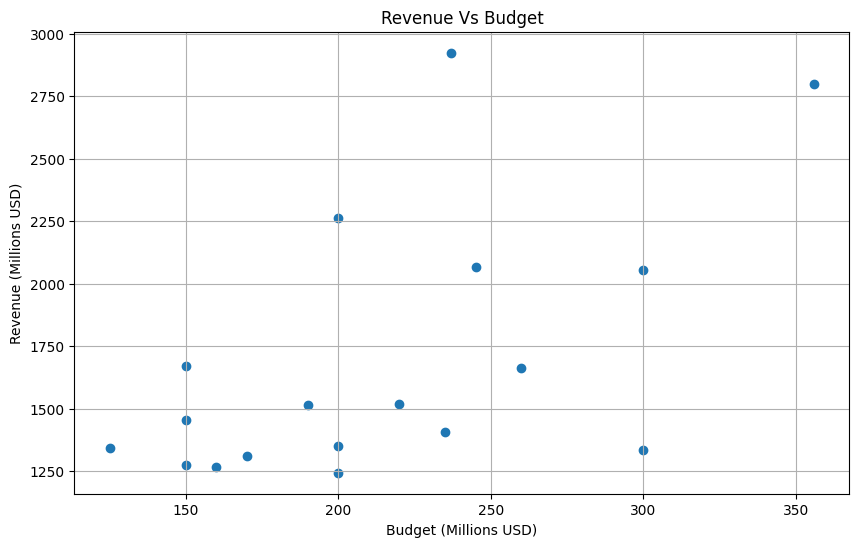

In [48]:
plot_revenue_vs_budget(df)

### 2. ROI Distribution by Genre

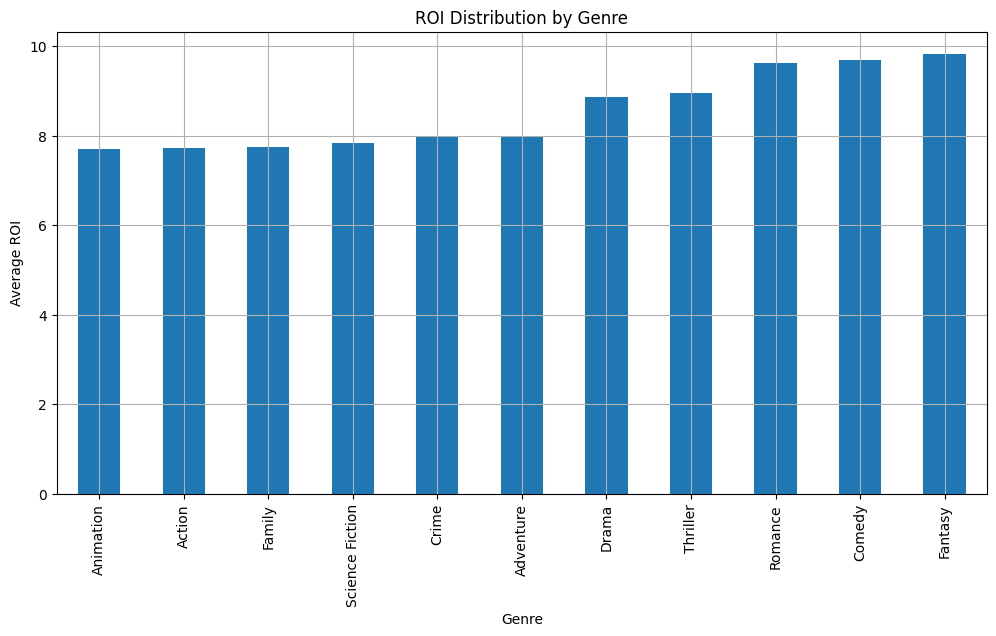

In [49]:
plot_roi_by_genre(df)

### 3. Popularity vs Rating

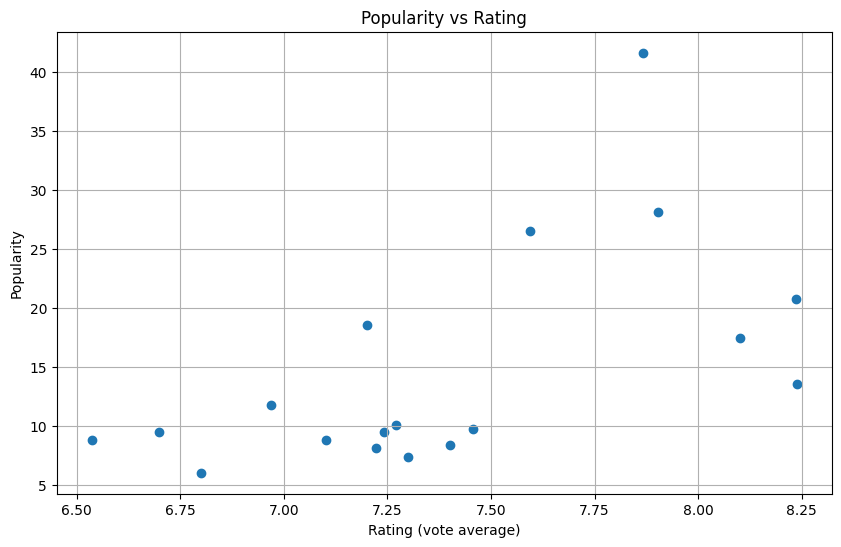

In [50]:
plot_popularity_vs_rating(df)

### 4. Yearly Box Office Trend

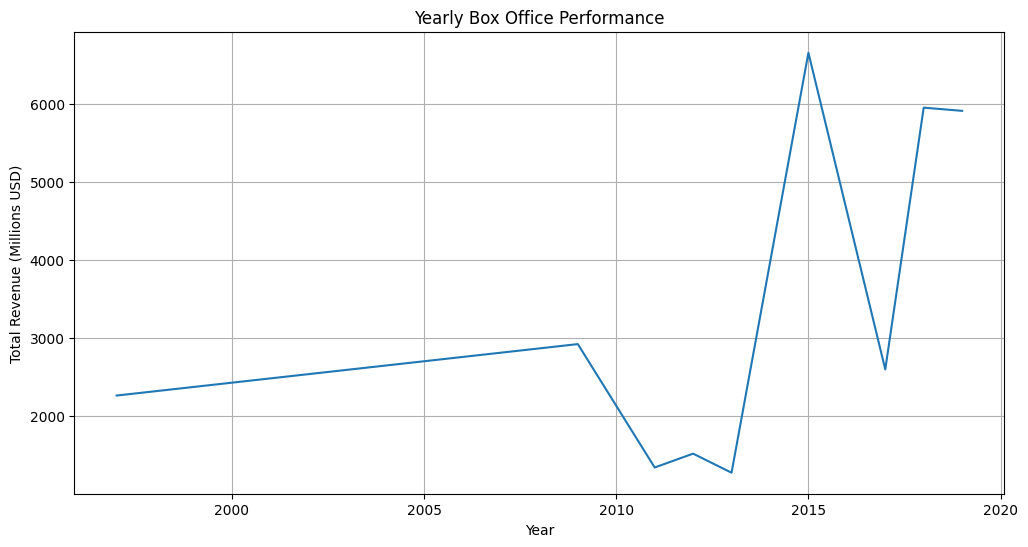

In [51]:
plot_yearly_box_office(df)

### 5. Franchise vs Standalone Comparison

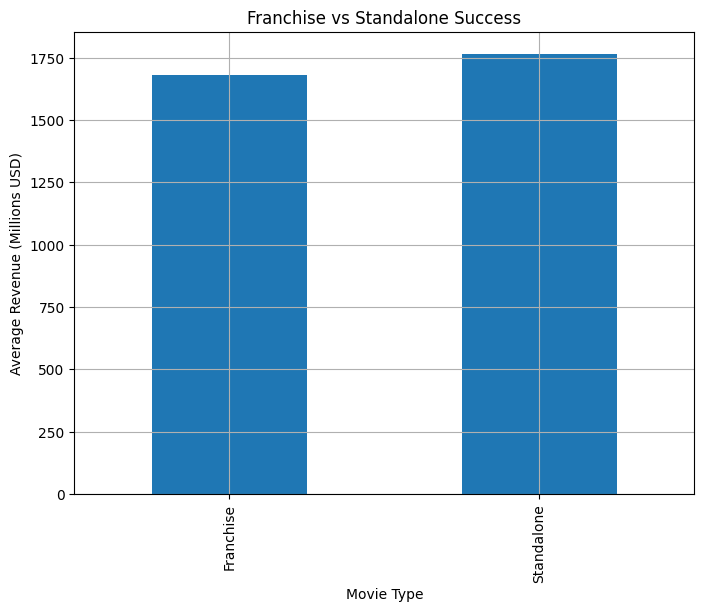

In [52]:
plot_franchise_vs_standalone(df)